# **Import Dataset**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve





df = pd.read_csv('Class-smell.csv')
print("Shape of original DataFrame: ", df.shape)
df


Shape of original DataFrame:  (91790, 49)


,Unnamed: 0,Address,Brain Class,Data Class,Futile Abstract Pipeline,Futile Hierarchy,God Class,Schizofrenic Class,ABUSEINH,AMW,...,NrBM,NrEC,NrFE,NrIC,NrSS,PNAS,SCHIZO,TCC,WMC,WOC
0,4,org.apache.ambari.log4j.hadoop.mapreduce.jobhi...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,0.00,2,0.00,3,1.0
1,46,org.apache.ambari.msi.StateProvider,0,0,0,0,0,1,0,0.0,...,0,0,0,0,0,-1.00,3,0.00,0,1.0
2,73,org.apache.ambari.server.controller.AbstractRo...,0,0,0,1,0,0,0,0.0,...,0,0,0,0,0,-1.00,0,0.00,0,1.0
3,87,org.apache.ambari.server.controller.internal.A...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,-1.00,4,0.14,9,1.0
4,89,org.apache.ambari.server.controller.internal.H...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,-1.00,2,0.71,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91785,303145,org.apache.bookkeeper.common.testing.annotatio...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,-1.00,0,0.00,0,0.0
91786,302625,com.scurrilous.circe.params.SipHash24Parameters,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0.67,0,0.00,5,1.0
91787,63756,org.springframework.security.oauth.provider.to...,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0.00,0,0.00,1,0.0
91788,25671,org.eclipse.mylyn.internal.github.ui.gist.Crea...,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,-1.00,0,1.00,2,0.0


# **Create new label 'IsCodeSmell'**

In [3]:
smell_columns = [
    'Brain Class', 'Data Class', 'Futile Abstract Pipeline', 'Futile Hierarchy',
    'God Class', 'Schizofrenic Class'
]

df['IsCodeSmell'] = df[smell_columns].max(axis=1)

df = df.drop(columns=['Unnamed: 0', 'Address', 'SCHIZO'] + smell_columns)
print("Shape after preprocessing: ", df.shape)
df

Shape after preprocessing:  (91790, 41)


,ABUSEINH,AMW,ATFD,BOvM,BUR,CBO,CC,CM,CRIX,DAC,...,NrBM,NrEC,NrFE,NrIC,NrSS,PNAS,TCC,WMC,WOC,IsCodeSmell
0,0,1.0,1,0,1.0,1,0,0,0.0,1,...,0,0,0,0,0,0.00,0.00,3,1.0,1
1,0,0.0,0,0,1.0,0,1,7,0.0,0,...,0,0,0,0,0,-1.00,0.00,0,1.0,1
2,0,0.0,0,0,1.0,0,3,4,0.0,0,...,0,0,0,0,0,-1.00,0.00,0,1.0,1
3,0,1.0,0,0,1.0,5,0,0,0.0,1,...,0,0,0,0,0,-1.00,0.14,9,1.0,1
4,0,1.0,1,0,1.0,5,0,0,0.0,1,...,0,0,0,0,0,-1.00,0.71,9,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91785,0,0.0,0,0,1.0,0,0,0,0.0,0,...,0,0,0,0,0,-1.00,0.00,0,0.0,0
91786,0,1.0,0,0,1.0,0,0,0,0.0,0,...,0,0,0,0,0,0.67,0.00,5,1.0,0
91787,0,1.0,0,0,1.0,0,0,0,0.0,0,...,0,0,0,0,0,0.00,0.00,1,0.0,0
91788,0,1.0,4,0,1.0,5,0,0,0.0,1,...,0,0,0,0,0,-1.00,1.00,2,0.0,0


# **Label Distribution**

C:\Users\PC\AppData\Local\Temp\ipykernel_12560\391680369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='IsCodeSmell', palette='Set2')


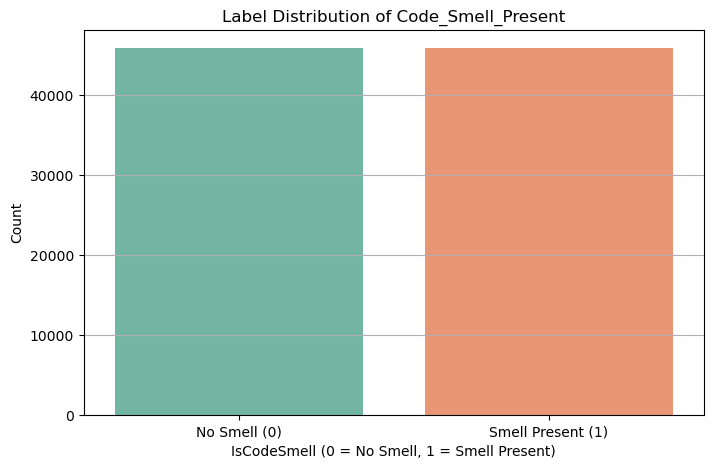

IsCodeSmell
1    45895
0    45895
Name: count, dtype: int64

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='IsCodeSmell', palette='Set2')
plt.title('Label Distribution of Code_Smell_Present')
plt.xlabel('IsCodeSmell (0 = No Smell, 1 = Smell Present)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Smell (0)', 'Smell Present (1)'])
plt.grid(axis='y')
plt.show()
df['IsCodeSmell'].value_counts()

# **Split features and target**

In [5]:
X = df.drop(columns=['IsCodeSmell'])
y = df['IsCodeSmell']

## **Split into Train and Test**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Evaluate Function**

In [7]:
def evaluate_model(model, X_test, y_test, model_name='Model'):
    """
    Trains and evaluates the given model, and displays performance metrics.
    """

   # Make predictions on training data
    y_train_pred = model.predict(X_train)

    # Make predictions on test data
    y_test_pred = model.predict(X_test)

    # Calculate and display metrics for training data
    print(f"--- Performance of {model_name} on Training Data ---")
    print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
    print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

    # Calculate and display metrics for test data
    print(f"\n--- Performance of {model_name} on Test Data ---")
    print("Testing Accuracy Score:", accuracy_score(y_test, y_test_pred))
    print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))

    # Confusion Matrix for Training Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Training Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Confusion Matrix for Test Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Testing Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve and AUC Score for Test Data
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

# **Random Forest**

Feature Importances:
      Feature  Importance
18       LOCC    0.215706
8        CRIX    0.139420
23       NOAM    0.087710
22        NOA    0.076787
38        WMC    0.059401
39        WOC    0.054662
26        NOM    0.051884
27       NOPA    0.048241
1         AMW    0.031545
12     FANOUT    0.025448
37        TCC    0.022803
5         CBO    0.020174
9         DAC    0.017732
10        DIT    0.014104
2        ATFD    0.013562
7          CM    0.013506
36       PNAS    0.011762
30     NTempF    0.011504
13        FDP    0.011142
20      NAbsM    0.011076
6          CC    0.009831
28     NProtM    0.008744
19        NAS    0.008096
24        NOD    0.006159
25       NODD    0.005720
4         BUR    0.004556
16        HIT    0.004174
14     GREEDY    0.003620
31       NrBM    0.002266
3        BOvM    0.002197
29     NSPECM    0.001987
33       NrFE    0.001508
35       NrSS    0.001031
34       NrIC    0.000704
0    ABUSEINH    0.000498
21        NDU    0.000412
32       NrEC    

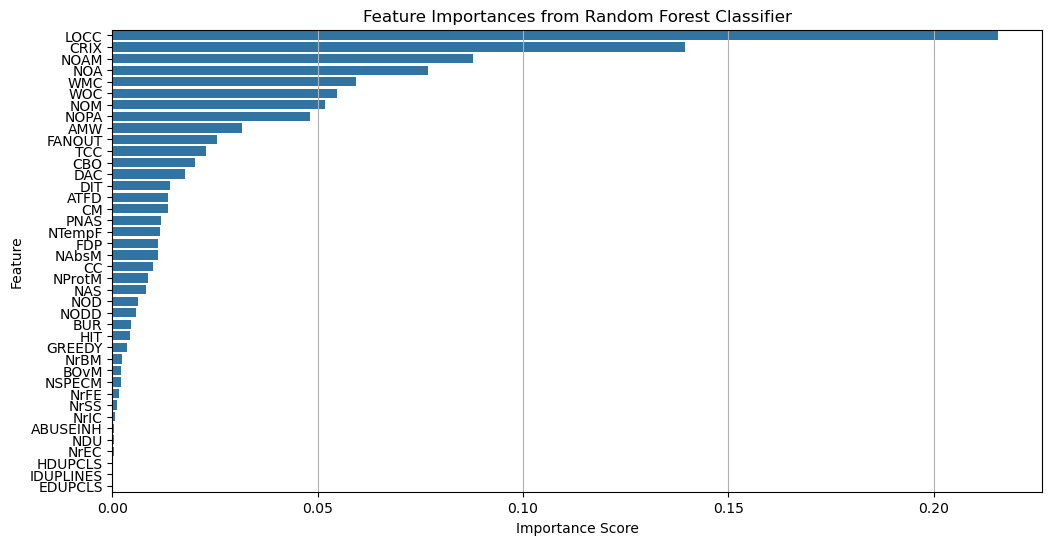

Cross-Validation Scores: [0.89276231 0.88969837 0.88792047 0.89152935 0.89459349]
Mean Cross-Validation Score: 0.89130079721259
--- Performance of Random Forest Classifier on Training Data ---
Training Accuracy Score: 0.992156008279769
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     36717
           1       0.99      0.99      0.99     36715

    accuracy                           0.99     73432
   macro avg       0.99      0.99      0.99     73432
weighted avg       0.99      0.99      0.99     73432


--- Performance of Random Forest Classifier on Test Data ---
Testing Accuracy Score: 0.8936158622943676
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      9178
           1       0.91      0.88      0.89      9180

    accuracy                           0.89     18358
   macro avg       0.89      0.89      0.89     1

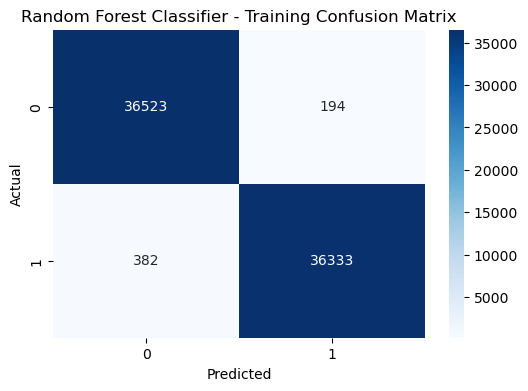

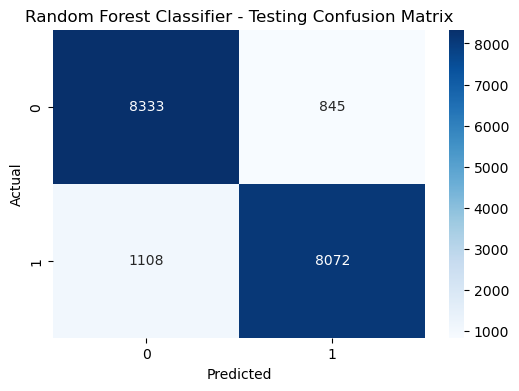

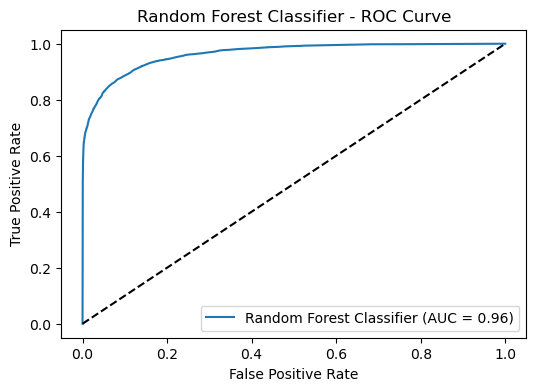

In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()




# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


evaluate_model(rf_model, X_test, y_test, model_name='Random Forest Classifier')

# **Gradient Boosting**


Feature Importances for Gradient Boosting Classifier:
      Feature  Importance
8        CRIX    0.628889
18       LOCC    0.277659
38        WMC    0.031083
20      NAbsM    0.016315
26        NOM    0.010376
1         AMW    0.008099
22        NOA    0.006295
9         DAC    0.003196
12     FANOUT    0.002951
24        NOD    0.002776
10        DIT    0.001957
39        WOC    0.001709
36       PNAS    0.001450
37        TCC    0.001414
7          CM    0.001318
5         CBO    0.000716
33       NrFE    0.000480
16        HIT    0.000473
19        NAS    0.000459
25       NODD    0.000381
6          CC    0.000302
29     NSPECM    0.000292
27       NOPA    0.000269
28     NProtM    0.000246
13        FDP    0.000239
23       NOAM    0.000209
21        NDU    0.000160
4         BUR    0.000129
2        ATFD    0.000081
0    ABUSEINH    0.000050
34       NrIC    0.000028
35       NrSS    0.000000
11    EDUPCLS    0.000000
32       NrEC    0.000000
31       NrBM    0.000000
30     NT

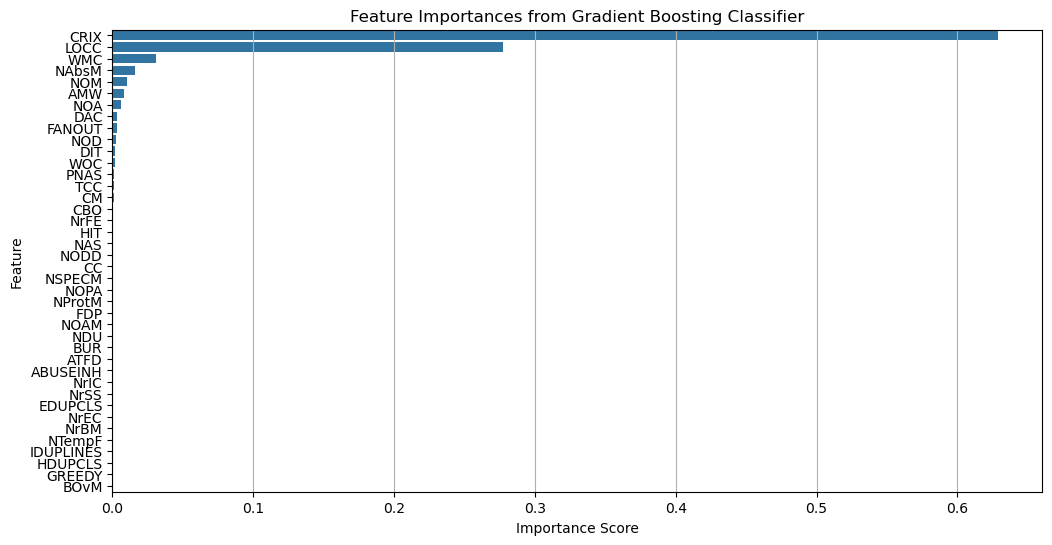

Cross-Validation Scores (Gradient Boosting): [0.87635324 0.87322122 0.8687866  0.87580008 0.87614054]
Mean Cross-Validation Score (Gradient Boosting): 0.8740603353608389
--- Performance of Gradient Boosting Classifier on Training Data ---
Training Accuracy Score: 0.8779823510186294
Training Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88     36717
           1       0.90      0.85      0.87     36715

    accuracy                           0.88     73432
   macro avg       0.88      0.88      0.88     73432
weighted avg       0.88      0.88      0.88     73432


--- Performance of Gradient Boosting Classifier on Test Data ---
Testing Accuracy Score: 0.8779278788539057
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      9178
           1       0.90      0.85      0.87      9180

    accuracy                           0.88     1835

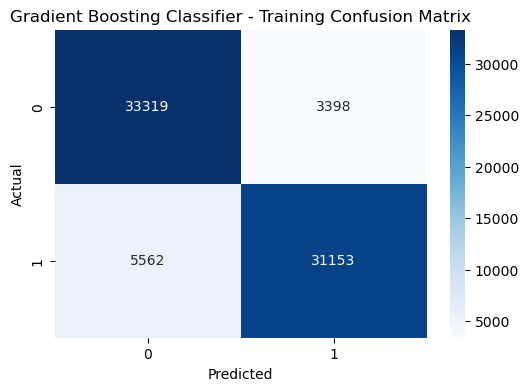

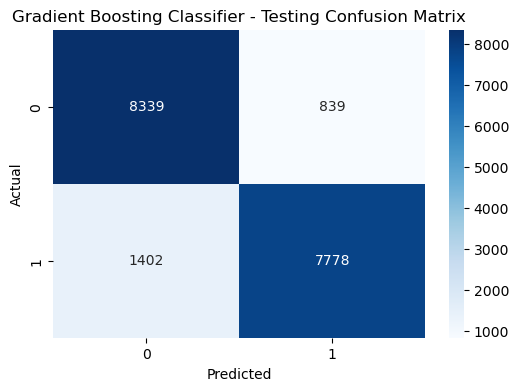

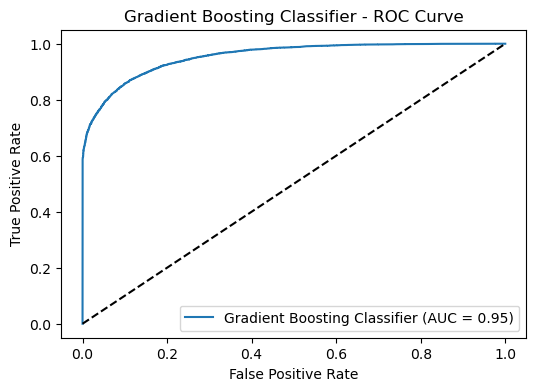

In [9]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
importances = gb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("\nFeature Importances for Gradient Boosting Classifier:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Gradient Boosting Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

# Perform cross-validation for Gradient Boosting
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (Gradient Boosting):", cv_scores_gb)
print("Mean Cross-Validation Score (Gradient Boosting):", np.mean(cv_scores_gb))




evaluate_model(gb_model, X_test, y_test, model_name='Gradient Boosting Classifier')


# **Logistic Regression**

d:\Apps\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Apps\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

Cross-Validation Scores (Logistic Regression): [0.83155171 0.8321645  0.82650143 0.82854419 0.83208498]
Mean Cross-Validation Score (Logistic Regression): 0.8301693624375377
--- Performance of Logistic Regression on Training Data ---
Training Accuracy Score: 0.8306460398736246
Training Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84     36717
           1       0.90      0.75      0.82     36715

    accuracy                           0.83     73432
   macro avg       0.84      0.83      0.83     73432
weighted avg       0.84      0.83      0.83     73432


--- Performance of Logistic Regression on Test Data ---
Testing Accuracy Score: 0.8330972872861968
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      9178
           1       0.90      0.75      0.82      9180

    accuracy                           0.83     18358
   macro avg

d:\Apps\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


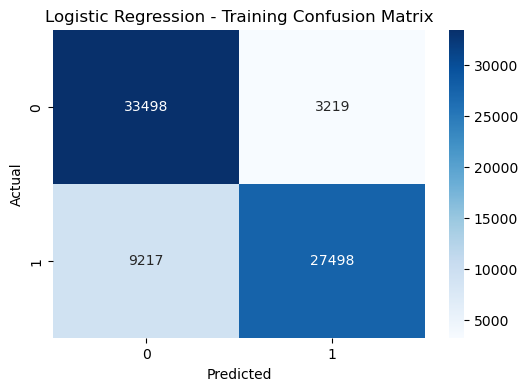

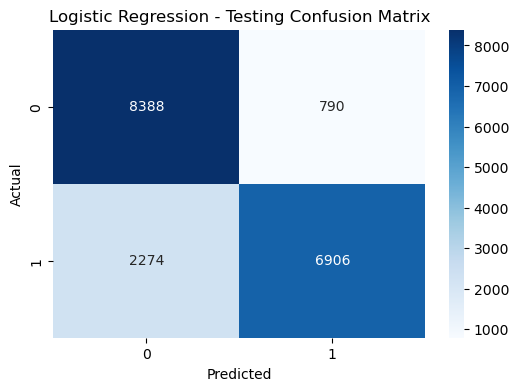

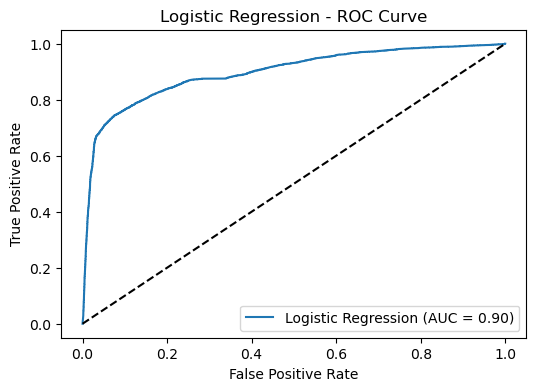

In [10]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (Logistic Regression):", cv_scores_lr)
print("Mean Cross-Validation Score (Logistic Regression):", np.mean(cv_scores_lr))



evaluate_model(lr_model, X_test, y_test, model_name='Logistic Regression')

# **AdaBoost Classifier**

d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Feature Importances for AdaBoost Classifier:
      Feature  Importance
18       LOCC        0.28
20      NAbsM        0.12
8        CRIX        0.12
38        WMC        0.10
33       NrFE        0.06
10        DIT        0.04
34       NrIC        0.04
26        NOM        0.04
23       NOAM        0.04
39        WOC        0.04
9         DAC        0.02
27       NOPA        0.02
37        TCC        0.02
16        HIT        0.02
1         AMW        0.02
22        NOA        0.02
2        ATFD        0.00
36       PNAS        0.00
35       NrSS        0.00
3        BOvM        0.00
4         BUR        0.00
32       NrEC        0.00
31       NrBM        0.00
30     NTempF        0.00
29     NSPECM        0.00
28     NProtM        0.00
25       NODD        0.00
5         CBO        0.00
11    EDUPCLS        0.00
24        NOD        0.00
6          CC        0.00
21        NDU        0.00
19        NAS        0.00
7          CM        0.00
17  IDUPLINES        0.00
15    HDUPCLS     

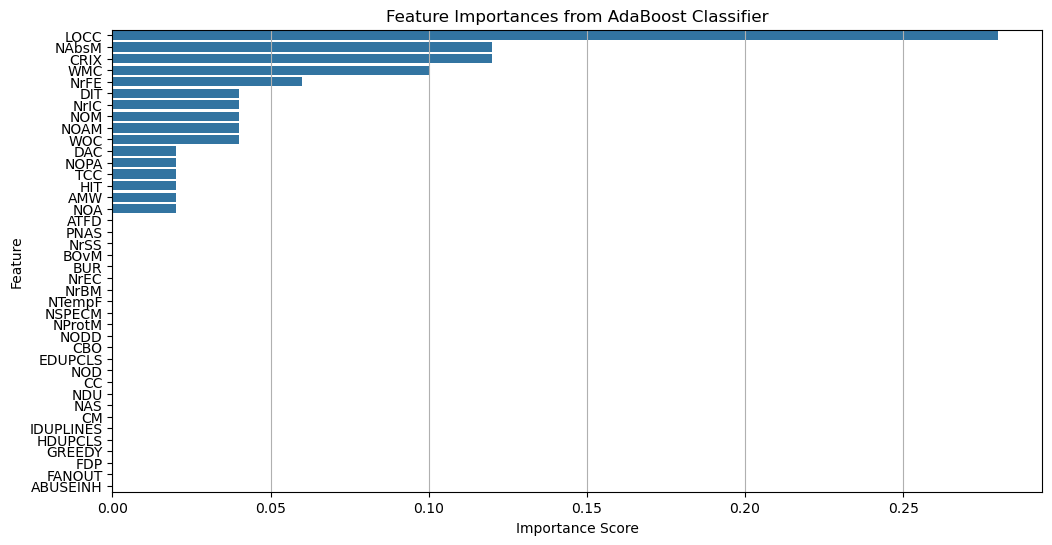

d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\skle

Cross-Validation Scores (AdaBoost): [0.86436985 0.86069313 0.85482773 0.86224976 0.86156884]
Mean Cross-Validation Score (AdaBoost): 0.860741862141075
--- Performance of AdaBoost Classifier on Training Data ---
Training Accuracy Score: 0.8597614119185096
Training Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.86     36717
           1       0.89      0.82      0.85     36715

    accuracy                           0.86     73432
   macro avg       0.86      0.86      0.86     73432
weighted avg       0.86      0.86      0.86     73432


--- Performance of AdaBoost Classifier on Test Data ---
Testing Accuracy Score: 0.8583178995533283
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      9178
           1       0.89      0.82      0.85      9180

    accuracy                           0.86     18358
   macro avg       0.86      0.86  

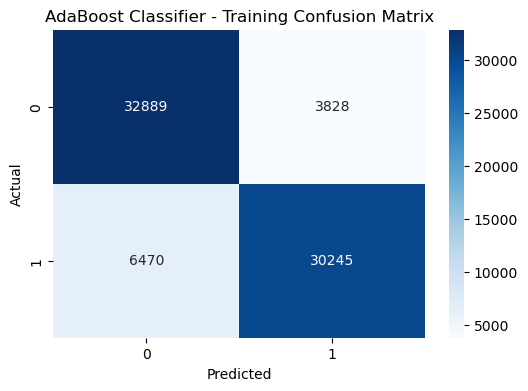

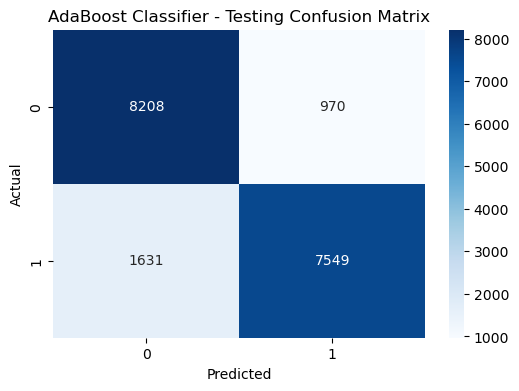

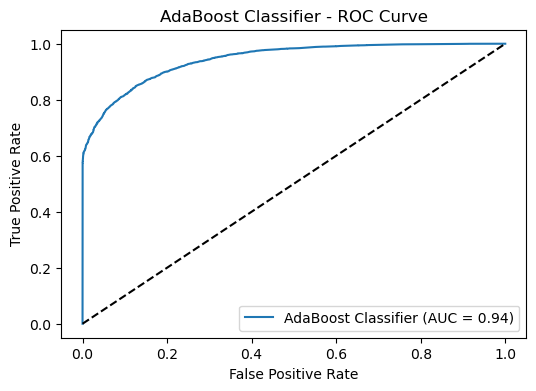

In [11]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
importances = ada_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("\nFeature Importances for AdaBoost Classifier:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from AdaBoost Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

# Perform cross-validation for AdaBoost
cv_scores_ada = cross_val_score(ada_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (AdaBoost):", cv_scores_ada)
print("Mean Cross-Validation Score (AdaBoost):", np.mean(cv_scores_ada))

evaluate_model(ada_model, X_test, y_test, model_name='AdaBoost Classifier')


# **Multi-Layer Perceptron (MLP)**

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
# Cross-validation for MLP
cv_scores_mlp = cross_val_score(mlp_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (MLP):", cv_scores_mlp)
print("Mean Cross-Validation Score (MLP):", np.mean(cv_scores_mlp))

evaluate_model(mlp_model, X_test, y_test, model_name='Multi-Layer Perceptron (MLP) Classifier')


d:\Apps\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
